In [3]:
%%javascript
function ClickConnect(){
console.log("Working");
document.querySelector("colab-toolbar-button#connect").click()
}setInterval(ClickConnect,60000)

<IPython.core.display.Javascript object>

In [4]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

     |████████████████████████████████| 212.3MB 64kB/s 
     |████████████████████████████████| 204kB 43.6MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.1-py2.py3-none-any.whl size=212767604 sha256=e9c2441c6b16664be4f90f02d889cda1e1299a2fabc00cf49ae5c7a3686867f0
  Stored in directory: /root/.cache/pip/wheels/0b/90/c0/01de724414ef122bd05f056541fb6a0ecf47c7ca655f8b3c0f
Successfully built pyspark
The following additional packages will be installed:
  openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 2 newly installed, 0 to remove and 31 not upgraded.
Need to get 36.5 MB of archives.
After this operation, 143 MB of additional disk space will be used.
Selecting previously unselected package openjdk-8-jre-headless:amd64.
(Reading

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pyspark
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark import SparkContext, SparkConf
import python_utils



In [8]:
# create the session
conf = SparkConf().set("spark.ui.port", "4050")

# create the context
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession.builder.getOrCreate()

In [9]:
grocery_food = spark.read.json("/content/drive/MyDrive/big_dta/project/Grocery_and_Gourmet_Food.json.gz")
meta_data = spark.read.json("/content/drive/MyDrive/big_dta/project/meta_Grocery_and_Gourmet_Food.json.gz")

In [10]:
all_data = grocery_food.join(meta_data, ['asin'])
all_data.show()

+----------+-----+-------+--------------------+-----------+--------------+---------------+-----+--------------------+--------------+--------+----+--------------------+--------------------+--------------------+--------------------+----+--------------------+--------------------+-------+---+--------------------+--------+------+--------------------+------------+-----+-----+--------------------+
|      asin|image|overall|          reviewText| reviewTime|    reviewerID|   reviewerName|style|             summary|unixReviewTime|verified|vote|            also_buy|           also_view|               brand|            category|date|         description|             details|feature|fit|               image|main_cat| price|                rank|similar_item|tech1|tech2|               title|
+----------+-----+-------+--------------------+-----------+--------------+---------------+-----+--------------------+--------------+--------+----+--------------------+--------------------+--------------------+---

In [11]:
grocery_food.printSchema()

root
 |-- asin: string (nullable = true)
 |-- image: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- overall: double (nullable = true)
 |-- reviewText: string (nullable = true)
 |-- reviewTime: string (nullable = true)
 |-- reviewerID: string (nullable = true)
 |-- reviewerName: string (nullable = true)
 |-- style: struct (nullable = true)
 |    |-- Color:: string (nullable = true)
 |    |-- Design:: string (nullable = true)
 |    |-- Display Height:: string (nullable = true)
 |    |-- Edition:: string (nullable = true)
 |    |-- Flavor Name:: string (nullable = true)
 |    |-- Flavor:: string (nullable = true)
 |    |-- Format:: string (nullable = true)
 |    |-- Item Display Weight:: string (nullable = true)
 |    |-- Item Package Quantity:: string (nullable = true)
 |    |-- Material Type:: string (nullable = true)
 |    |-- Material:: string (nullable = true)
 |    |-- Number of Items:: string (nullable = true)
 |    |-- Package Quantity:: string (nulla

In [12]:
meta_data.printSchema()

root
 |-- also_buy: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- also_view: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- asin: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- category: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- date: string (nullable = true)
 |-- description: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- details: struct (nullable = true)
 |    |-- 
    Item Weight: 
    : string (nullable = true)
 |    |-- 
    Product Dimensions: 
    : string (nullable = true)
 |    |--  Date first listed on Amazon:: string (nullable = true)
 |    |--  UNSPSC Code:: string (nullable = true)
 |    |-- ASIN:: string (nullable = true)
 |    |-- ASIN: : string (nullable = true)
 |    |-- Audio CD: string (nullable = true)
 |    |-- Batteries: string (nullable = true)
 |    |-- Discontinued by manufacturer:: string (nullable = true)
 |    |-- 

In [13]:
grocery_food.take(1)

[Row(asin='1888861614', image=None, overall=5.0, reviewText='Very pleased with my purchase. Looks exactly like the picture and will look great on my cake. It definitely will sparkle.', reviewTime='06 4, 2013', reviewerID='ALP49FBWT4I7V', reviewerName='Lori', style=None, summary='Love it', unixReviewTime=1370304000, verified=True, vote=None)]

In [14]:
grocery_food.show()

+----------+-----+-------+--------------------+-----------+--------------+-------------------+-----+--------------------+--------------+--------+----+
|      asin|image|overall|          reviewText| reviewTime|    reviewerID|       reviewerName|style|             summary|unixReviewTime|verified|vote|
+----------+-----+-------+--------------------+-----------+--------------+-------------------+-----+--------------------+--------------+--------+----+
|1888861614| null|    5.0|Very pleased with...| 06 4, 2013| ALP49FBWT4I7V|               Lori| null|             Love it|    1370304000|    true|null|
|1888861614| null|    4.0|Very nicely craft...|05 23, 2014|A1KPIZOCLB9FZ8|         BK Shopper| null|      Nice but small|    1400803200|    true|null|
|1888861614| null|    4.0|still very pretty...| 05 9, 2014|A2W0FA06IYAYQE|     daninethequeen| null|the "s" looks lik...|    1399593600|    true|null|
|1888861614| null|    5.0|I got this for ou...|04 20, 2014|A2PTZTCH2QUYBC|            Tammara|

In [15]:
print("In total there are {0} reviews".format(grocery_food.count()))

In total there are 5074160 reviews


In [16]:
grocery_food = grocery_food.filter(grocery_food.reviewText != '')

In [17]:
drop_list = ['image', 'verified', 'vote', 'reviewTime', 'reviewerID', 'reviewerName', 'style', 'unixReviewTime']
grocery_food = grocery_food.select([column for column in grocery_food.columns if column not in drop_list])
grocery_food.show(5)

+----------+-------+--------------------+--------------------+
|      asin|overall|          reviewText|             summary|
+----------+-------+--------------------+--------------------+
|1888861614|    5.0|Very pleased with...|             Love it|
|1888861614|    4.0|Very nicely craft...|      Nice but small|
|1888861614|    4.0|still very pretty...|the "s" looks lik...|
|1888861614|    5.0|I got this for ou...|Would recommend t...|
|1888861614|    4.0|It was just what ...|              Topper|
+----------+-------+--------------------+--------------------+
only showing top 5 rows



### Group by stars and view

In [16]:
grocery_food.groupBy("overall").count().sort(desc("count")).show()

+-------+-------+
|overall|  count|
+-------+-------+
|    5.0|3571654|
|    4.0| 552993|
|    1.0| 405085|
|    3.0| 322083|
|    2.0| 219462|
+-------+-------+



In [17]:
grocery_food.registerTempTable("grocery_food")

query = """
SELECT overall, count(*) as star_count
FROM grocery_food
GROUP BY overall
ORDER BY star_count DESC
"""

star_counts = spark.sql(query)
star_counts.show()

+-------+----------+
|overall|star_count|
+-------+----------+
|    5.0|   3571654|
|    4.0|    552993|
|    1.0|    405085|
|    3.0|    322083|
|    2.0|    219462|
+-------+----------+



In [18]:
star_count_pd = star_counts.toPandas()
star_count_pd.head()
star_count_pd = star_count_pd.sort_values('overall')

Text(0.5, 1.0, 'Number of reviews by star rating')

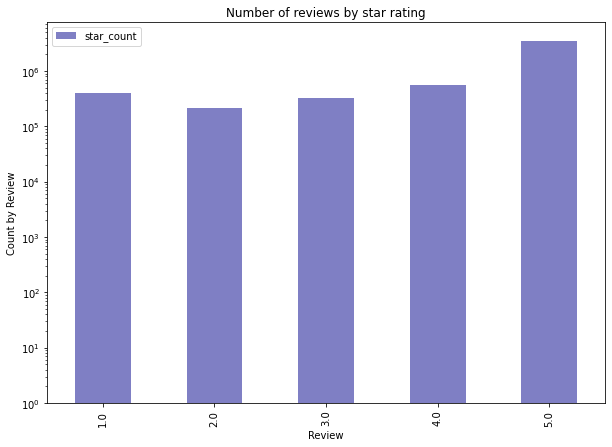

In [19]:
pl = star_count_pd.plot(kind="bar", 
                            x="overall", y="star_count", 
                            figsize=(10, 7), log=True, alpha=0.5, color="darkblue")
pl.set_xlabel("Review")
pl.set_ylabel("Count by Review")
pl.set_title("Number of reviews by star rating")

In [20]:
#total number of foods that were reviewed in the dataset
grocery_food.groupBy("asin").count().sort(desc("count")).count()

283483

### Text Analysis

In [18]:
from pyspark.ml.feature import Tokenizer

In [19]:
tokenizer = Tokenizer().setInputCol('reviewText').setOutputCol('words')

In [20]:
tokenizer.transform(grocery_food).show()

+----------+-------+--------------------+--------------------+--------------------+
|      asin|overall|          reviewText|             summary|               words|
+----------+-------+--------------------+--------------------+--------------------+
|1888861614|    5.0|Very pleased with...|             Love it|[very, pleased, w...|
|1888861614|    4.0|Very nicely craft...|      Nice but small|[very, nicely, cr...|
|1888861614|    4.0|still very pretty...|the "s" looks lik...|[still, very, pre...|
|1888861614|    5.0|I got this for ou...|Would recommend t...|[i, got, this, fo...|
|1888861614|    4.0|It was just what ...|              Topper|[it, was, just, w...|
|1888861614|    1.0|The S is beautifu...|   shipping disaster|[the, s, is, beau...|
|1888861614|    5.0|Omg.. The S was i...|Great quality for...|[omg.., the, s, w...|
|1888861614|    3.0|It was a nice siz...|          Great Buy.|[it, was, a, nice...|
|1888861614|    5.0|Perfect!!! Can no...|       Very Pretty!!|[perfect!!!, c

In [21]:
from pyspark.ml.feature import CountVectorizer

In [22]:
count_vectorizer_estimator = CountVectorizer().setInputCol('words').setOutputCol('features')

In [23]:
count_vectorizer_transformer = count_vectorizer_estimator.fit(tokenizer.transform(grocery_food))

In [24]:
count_vectorizer_transformer.transform(tokenizer.transform(grocery_food)).show(truncate=True)

+----------+-------+--------------------+--------------------+--------------------+--------------------+
|      asin|overall|          reviewText|             summary|               words|            features|
+----------+-------+--------------------+--------------------+--------------------+--------------------+
|1888861614|    5.0|Very pleased with...|             Love it|[very, pleased, w...|(262144,[0,2,6,12...|
|1888861614|    4.0|Very nicely craft...|      Nice but small|[very, nicely, cr...|(262144,[0,5,10,1...|
|1888861614|    4.0|still very pretty...|the "s" looks lik...|[still, very, pre...|(262144,[0,2,5,6,...|
|1888861614|    5.0|I got this for ou...|Would recommend t...|[i, got, this, fo...|(262144,[1,2,5,6,...|
|1888861614|    4.0|It was just what ...|              Topper|[it, was, just, w...|(262144,[0,1,5,6,...|
|1888861614|    1.0|The S is beautifu...|   shipping disaster|[the, s, is, beau...|(262144,[0,6,9,11...|
|1888861614|    5.0|Omg.. The S was i...|Great quality 

In [28]:
#count_vectorizer_transformer.vocabulary

### Put into Pipeline

In [25]:
from pyspark.ml import Pipeline

In [26]:
import requests
stop_words = requests.get('http://ir.dcs.gla.ac.uk/resources/linguistic_utils/stop_words').text.split()
from pyspark.ml.feature import StopWordsRemover
sw_filter = StopWordsRemover()\
  .setStopWords(stop_words)\
  .setCaseSensitive(False)\
  .setInputCol("words")\
  .setOutputCol("filtered")

stop_words[0:10]

['a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost']

In [27]:
pipeline_cv_estimator = Pipeline(stages=[tokenizer, sw_filter, count_vectorizer_estimator])

In [28]:
pipeline_cv_transformer = pipeline_cv_estimator.fit(grocery_food)

In [29]:
dataset = pipeline_cv_transformer.transform(grocery_food)

### Predict Rating

In [30]:
dataframe_new = pyspark.sql.DataFrame.sample(dataset, .01, seed=None)

In [31]:
(trainingData, testData) = dataframe_new.randomSplit([0.7, 0.3], seed = 100)
print("Training Dataset Count: " + str(trainingData.count()))
print("Test Dataset Count: " + str(testData.count()))

Training Dataset Count: 35358
Test Dataset Count: 15161


In [32]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(labelCol='overall',featuresCol='features', maxIter=20, regParam=0.3, elasticNetParam=0)
lrModel = lr.fit(trainingData)
predictions = lrModel.transform(testData)
predictions.filter(predictions['prediction'] == 1.0) \
    .select("reviewText","overall","probability","prediction") \
    .orderBy("probability", ascending=False) \
    .show(n = 10, truncate = 30)

+------------------------------+-------+------------------------------+----------+
|                    reviewText|overall|                   probability|prediction|
+------------------------------+-------+------------------------------+----------+
|Most of the candies explode...|    1.0|[4.974632712319836E-5,0.242...|       1.0|
|Did not like the product ov...|    2.0|[4.958191484278297E-5,0.256...|       1.0|
|I had a lot of hard, burnt ...|    2.0|[4.921113730042096E-5,0.277...|       1.0|
|I don't know if I got an ol...|    2.0|[4.9119477588068636E-5,0.23...|       1.0|
|I bought this flavor becaus...|    3.0|[4.868604342071291E-5,0.236...|       1.0|
|I am not sure if I just got...|    5.0|[4.847781940297389E-5,0.310...|       1.0|
|I realllllly realllly tried...|    1.0|[4.829369154448379E-5,0.271...|       1.0|
|Bought the pack of 4. Manag...|    2.0|[4.770776629591686E-5,0.284...|       1.0|
|I did not like this at all,...|    1.0|[4.758157214306874E-5,0.316...|       1.0|
|Vos

In [33]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(labelCol='overall', predictionCol="prediction")
evaluator.evaluate(predictions)

0.6312249772342636

In [34]:
import pyspark.sql.functions as F
pred_grouped = predictions.withColumn('flag', F.when(((F.col("prediction") <= F.lit(3)) & (F.col("overall") <= F.lit(3))) | ((F.col("prediction") > F.lit(3)) & (F.col("overall") > F.lit(3))), 1).otherwise(0))


In [35]:
pred_grouped.take(1)

[Row(asin='9552900026', overall=5.0, reviewText="It's magic how well this stuff works. And the shipping was incredible fast. Both thumbs up!", summary='Five Stars', words=["it's", 'magic', 'how', 'well', 'this', 'stuff', 'works.', 'and', 'the', 'shipping', 'was', 'incredible', 'fast.', 'both', 'thumbs', 'up!'], filtered=["it's", 'magic', 'stuff', 'works.', 'shipping', 'incredible', 'fast.', 'thumbs', 'up!'], features=SparseVector(262144, {0: 1.0, 2: 1.0, 7: 1.0, 15: 1.0, 39: 1.0, 106: 1.0, 145: 1.0, 186: 1.0, 300: 1.0, 336: 1.0, 1360: 1.0, 2327: 1.0, 2482: 1.0, 2832: 1.0, 2947: 1.0, 3156: 1.0}), rawPrediction=DenseVector([-6.9048, 0.4795, 0.1422, 0.4329, 1.9544, 3.8957]), probability=DenseVector([0.0, 0.0267, 0.019, 0.0255, 0.1166, 0.8122]), prediction=5.0, flag=1)]

In [36]:
pred_grouped.select(F.sum('flag')/count('flag')).collect()[0][0]
#make 3 negative or ignore 3

0.8389288305520745

In [41]:
trainingSummary = lrModel.summary

accuracy = trainingSummary.accuracy
falsePositiveRate = trainingSummary.weightedFalsePositiveRate
truePositiveRate = trainingSummary.weightedTruePositiveRate
print(accuracy, falsePositiveRate, truePositiveRate)

0.8651278887143818 0.31781323565066094 0.8651278887143818


In [42]:
dataframe_new.show()

+----------+-------+--------------------+--------------------+--------------------+--------------------+--------------------+
|      asin|overall|          reviewText|             summary|               words|            filtered|            features|
+----------+-------+--------------------+--------------------+--------------------+--------------------+--------------------+
|B00005344V|    5.0|This stuff cleare...|I now only have t...|[this, stuff, cle...|[stuff, cleared, ...|(262144,[0,1,2,3,...|
|B00005344V|    5.0|I have mild, alle...|    Breathe Easy Tea|[i, have, mild,, ...|[mild,, allergy-i...|(262144,[0,1,2,3,...|
|B000053408|    5.0|   Just as described|                Fast|[just, as, descri...|   [just, described]|(262144,[19,31,11...|
|B00005IX97|    5.0|Now I'm ordering ...|Perfect No Mess Pods|[now, i'm, orderi...|[i'm, ordering, b...|(262144,[0,1,2,4,...|
|B00006429V|    5.0|This piece was so...|Absolutely gorgeo...|[this, piece, was...|[piece, beautiful...|(262144,[2,3,4

In [43]:
#use tf-idf
from pyspark.ml.feature import HashingTF, IDF
hashingTF = HashingTF(inputCol="filtered", outputCol="rawFeatures", numFeatures=10000)
idf = IDF(inputCol="rawFeatures", outputCol="features_new", minDocFreq=5) #minDocFreq: remove sparse terms
pipeline = Pipeline(stages=[tokenizer, sw_filter, hashingTF, idf])
pipelineFit = pipeline.fit(grocery_food)
dataset = pipelineFit.transform(grocery_food)
(trainingData, testData) = dataset.randomSplit([0.7, 0.3], seed = 100)
lr = LogisticRegression(labelCol='overall',featuresCol='features_new',maxIter=20, regParam=0.3, elasticNetParam=0)
lrModel = lr.fit(trainingData)
predictions = lrModel.transform(testData)


In [44]:
predictions.filter(predictions['prediction'] == 1.0) \
    .select("overall","reviewText","probability","prediction") \
    .orderBy("probability", ascending=False) \
    .show(n = 10, truncate = 30)

+-------+------------------------------+------------------------------+----------+
|overall|                    reviewText|                   probability|prediction|
+-------+------------------------------+------------------------------+----------+
|    1.0|It was ordered as an add on...|[5.070561816939754E-7,0.211...|       1.0|
|    1.0|It was highly recommended t...|[5.070229971549751E-7,0.209...|       1.0|
|    2.0|All the ingredients looked ...|[5.064961642936127E-7,0.219...|       1.0|
|    3.0|I wanted to like this healt...|[5.063017905944089E-7,0.224...|       1.0|
|    1.0|The tea is fragrant but lac...|[5.061964635132904E-7,0.217...|       1.0|
|    1.0|While the writeup here does...|[5.060956934631534E-7,0.217...|       1.0|
|    3.0|I've tried a couple of flav...|[5.058414129838791E-7,0.216...|       1.0|
|    4.0|I love these rice noodles! ...|[5.05839839118438E-7,0.2150...|       1.0|
|    2.0|I have been eating Smucker'...|[5.05666613781337E-7,0.2265...|       1.0|
|   

In [45]:
pred_grouped = predictions.withColumn('flag', F.when(((F.col("prediction") <= F.lit(3)) & (F.col("overall") <= F.lit(3))) | ((F.col("prediction") > F.lit(3)) & (F.col("overall") > F.lit(3))), 1).otherwise(0))

In [46]:
pred_grouped.select(F.sum('flag')/count('flag')).collect()[0][0]

0.8383046196707926

### Random Forest

In [47]:
dataframe_new = pyspark.sql.DataFrame.sample(dataset, .01, seed=None)

In [48]:
dataframe_new.show()

+----------+-------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|      asin|overall|          reviewText|             summary|               words|            filtered|         rawFeatures|        features_new|
+----------+-------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|4639725183|    4.0|Tea made with Lip...|          Four Stars|[tea, made, with,...|[tea, lipton, yel...|(10000,[2366,2543...|(10000,[2366,2543...|
|4639725043|    5.0|We discovered 'Ye...|   Fresh, strong tea|[we, discovered, ...|[discovered, 'yel...|(10000,[576,693,1...|(10000,[576,693,1...|
|5463213682|    5.0|        Great Coffee|          Five Stars|     [great, coffee]|     [great, coffee]|(10000,[750,2700]...|(10000,[750,2700]...|
|5463213682|    1.0|Don't buy this pr...| Astroturfed reviews|[don't, buy, this...|[don't, buy, prod...|(10000,[80,268

In [49]:
(trainingData, testData) = dataframe_new.randomSplit([0.7, 0.3], seed = 100)
print("Training Dataset Count: " + str(trainingData.count()))
print("Test Dataset Count: " + str(testData.count()))

Training Dataset Count: 35456
Test Dataset Count: 15197


In [50]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(labelCol="overall", \
                            featuresCol="features_new")
# Train model with Training Data
rfModel = rf.fit(trainingData)
predictions = rfModel.transform(testData)
predictions.filter(predictions['prediction'] == 5.0) \
    .select("reviewText","overall","probability","prediction") \
    .orderBy("probability", ascending=False) \
    .show(n = 10, truncate = 30)

+------------------------------+-------+------------------------------+----------+
|                    reviewText|overall|                   probability|prediction|
+------------------------------+-------+------------------------------+----------+
|I was excited to be able to...|    1.0|[0.0,0.20688356323070303,0....|       5.0|
|These things are vile.  I w...|    1.0|[0.0,0.20583111874409177,0....|       5.0|
|Bars were hard, broken and ...|    1.0|[0.0,0.17900660520744327,0....|       5.0|
|I had been anxiously awaiti...|    3.0|[0.0,0.17690486109043618,0....|       5.0|
|The lemon bars didn't come ...|    1.0|[0.0,0.17473131366057953,0....|       5.0|
|I bought these for my son w...|    1.0|[0.0,0.16898480426018592,0....|       5.0|
|The worst hot cocoa I have ...|    1.0|[0.0,0.16617529068535614,0....|       5.0|
|I ordered these after heari...|    1.0|[0.0,0.16535975535628242,0....|       5.0|
|This is one of my preferred...|    5.0|[0.0,0.16457014899885897,0....|       5.0|
|I o

In [51]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(labelCol='overall', predictionCol="prediction")
evaluator.evaluate(predictions)

0.5807869549805034

In [52]:
pred_grouped = predictions.withColumn('flag', F.when(((F.col("prediction") <= F.lit(3)) & (F.col("overall") <= F.lit(3))) | ((F.col("prediction") > F.lit(3)) & (F.col("overall") > F.lit(3))), 1).otherwise(0))

In [53]:
pred_grouped.select(F.sum('flag')/count('flag')).collect()[0][0]

0.8114101467394881

In [42]:
pred_grouped.show()

+----------+-------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+----+
|      asin|overall|          reviewText|             summary|               words|            filtered|            features|       rawPrediction|         probability|prediction|flag|
+----------+-------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+----+
|9552900026|    5.0|It's magic how we...|          Five Stars|[it's, magic, how...|[it's, magic, stu...|(262144,[0,2,7,15...|[-6.9047523989905...|[1.65621389700216...|       5.0|   1|
|B00004S1C5|    1.0|         Not organic|This shows up on ...|      [not, organic]|           [organic]|(262144,[14,227],...|[-6.9041610564757...|[2.74996486037243...|       5.0|   0|
|B00004S1C5|    5.0|Colors without ad...|        Does the job|[colors, without,.

### Sentiment Analysis

In [43]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType


In [44]:
from pyspark.sql.types import FloatType

from textblob import TextBlob

def sentiment_analysis(text):
    return TextBlob(text).sentiment.polarity

sentiment_analysis_udf = udf(sentiment_analysis , FloatType())

In [45]:
pred_grouped = pred_grouped.withColumn("sentiment_score", sentiment_analysis_udf(pred_grouped['reviewText'] ))

In [48]:
def condition(r):
    if (r >0):
        label = "positive"
    elif(r <= 0):
        label = "negative"
    return label

sentiment_udf = udf(lambda x: condition(x), StringType())

In [49]:
pred_grouped.withColumn("sentiment", sentiment_udf(pred_grouped['sentiment_score'] )).show()

+----------+-------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+----+---------------+---------+
|      asin|overall|          reviewText|             summary|               words|            filtered|            features|       rawPrediction|         probability|prediction|flag|sentiment_score|sentiment|
+----------+-------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+----+---------------+---------+
|9552900026|    5.0|It's magic how we...|          Five Stars|[it's, magic, how...|[it's, magic, stu...|(262144,[0,2,7,15...|[-6.9047523989905...|[1.65621389700216...|       5.0|   1|           0.55| positive|
|B00004S1C5|    1.0|         Not organic|This shows up on ...|      [not, organic]|           [organic]|(262144,[14,227],...|[-6.9041610564757...|[2.74996486037

In [68]:
def condition(r):
    if (r >0.3):
        label = "positive"
    elif(r <= 0):
        label = "negative"
    else:
        label = "neutral"
    return label

sentiment_udf = udf(lambda x: condition(x), StringType())

In [69]:
pred_grouped = pred_grouped.withColumn("sentiment", sentiment_udf(pred_grouped['sentiment_score'] ))

In [70]:
pred_grouped.groupBy("sentiment").count().sort(desc("count")).show()

+---------+-----+
|sentiment|count|
+---------+-----+
| positive| 8166|
|  neutral| 4395|
| negative| 2600|
+---------+-----+



In [71]:
pred_grouped.registerTempTable("pred_grouped")

query = """
SELECT sentiment, count(*) as sent_count
FROM pred_grouped
GROUP BY sentiment
ORDER BY sent_count DESC
"""

sent_count = spark.sql(query)
sent_count.show()

+---------+----------+
|sentiment|sent_count|
+---------+----------+
| positive|      8166|
|  neutral|      4395|
| negative|      2600|
+---------+----------+



In [72]:
sent_count_pd = sent_count.toPandas()
sent_count_pd.head()


,sentiment,sent_count
0,positive,8166
1,neutral,4395
2,negative,2600


Text(0.5, 1.0, 'Number of reviews by sentiment')

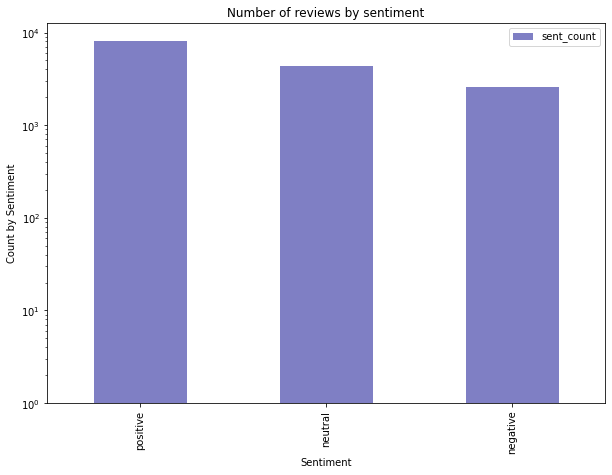

In [74]:
pl = sent_count_pd.plot(kind="bar", 
                            x="sentiment", y="sent_count", 
                            figsize=(10, 7), log=True, alpha=0.5, color="darkblue")
pl.set_xlabel("Sentiment")
pl.set_ylabel("Count by Sentiment")
pl.set_title("Number of reviews by sentiment")